In [1]:
#Import libraries for data exploration etc
#data is already cleaned
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

df = pd.read_csv("train_house.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print(col,missing_data)

#some missing data

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.1773972602739726
LotArea 0.0
Street 0.0
Alley 0.9376712328767123
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinSF1 0.0
BsmtFinType2 0.026027397260273973
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0006849315068493151
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
F

In [4]:
#assign ID values for correlation matrix
df_num = df
for col_name in df_num.columns:
    if(df_num[col_name].dtype == "object"):
        df_num[col_name] = df_num[col_name].astype("category")
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,-1,3,3,0,...,0,-1,-1,-1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,-1,3,3,0,...,0,-1,2,-1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,-1,3,3,0,...,0,-1,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,-1,3,3,0,...,0,-1,-1,-1,0,4,2010,8,4,142125


In [8]:
corr = df_num.corr()
corr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,-0.000293,0.032122,-0.019659,0.013324,...,0.057044,0.066509,-0.013202,-0.038220,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,0.179144,0.119289,-0.002940,-0.022844,...,0.008283,0.010353,-0.108141,-0.045738,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.191736,0.061887,-0.017854,-0.001192,...,-0.003128,-0.002945,0.066785,-0.004913,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,-0.190957,-0.169641,-0.080757,NaN,...,0.206167,0.219815,0.021650,0.010053,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,-0.083668,-0.165315,-0.149083,0.010123,...,0.077672,0.093908,-0.051306,0.109354,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843


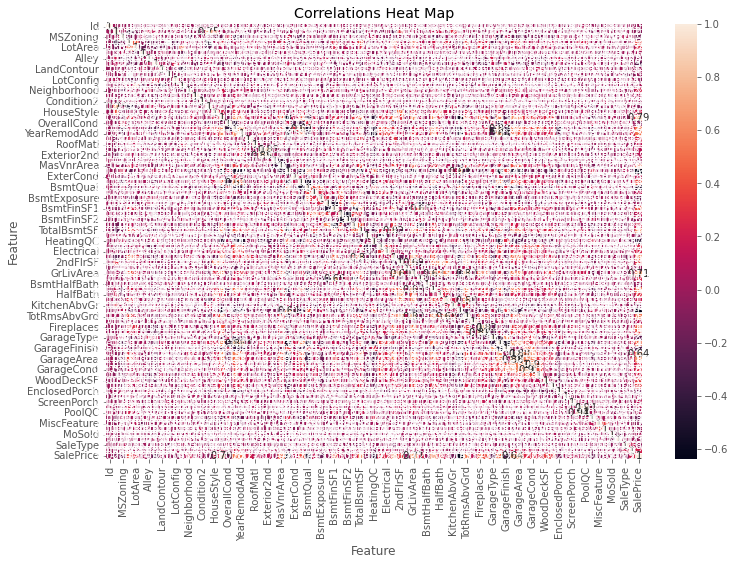

In [6]:
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlations Heat Map")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()
#that's a no on the correlation matrix...

In [24]:
corr_relevant = corr[["SalePrice"]]

corr_relevant = corr_relevant.loc[(corr_relevant['SalePrice'] > 0.3)]

print(corr_relevant.to_string())

              SalePrice
LotFrontage    0.351799
OverallQual    0.790982
YearBuilt      0.522897
YearRemodAdd   0.507101
MasVnrArea     0.477493
Foundation     0.382479
BsmtFinSF1     0.386420
TotalBsmtSF    0.613581
1stFlrSF       0.605852
2ndFlrSF       0.319334
GrLivArea      0.708624
FullBath       0.560664
TotRmsAbvGrd   0.533723
Fireplaces     0.466929
FireplaceQu    0.378377
GarageYrBlt    0.486362
GarageCars     0.640409
GarageArea     0.623431
WoodDeckSF     0.324413
OpenPorchSF    0.315856
SalePrice      1.000000


In [27]:
y = df.SalePrice
house_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'Foundation', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
                 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
X = df[house_features]

X.describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,6.099315,1971.267808,1984.865753,103.685262,1.396575,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,6.517808,0.613014,0.969178,1978.506164,1.767123,472.980137,94.244521,46.660274
std,24.284752,1.382997,30.202904,20.645407,181.066207,0.722394,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,1.625393,0.644666,2.037956,24.689725,0.747315,213.804841,125.338794,66.256028
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,2.000000,0.000000,-1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,5.000000,1954.000000,1967.000000,0.000000,1.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,5.000000,0.000000,-1.000000,1961.000000,1.000000,334.500000,0.000000,0.000000
50%,69.000000,6.000000,1973.000000,1994.000000,0.000000,1.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,6.000000,1.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000
75%,80.000000,7.000000,2000.000000,2004.000000,166.000000,2.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,7.000000,1.000000,2.000000,2002.000000,2.000000,576.000000,168.000000,68.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,14.000000,3.000000,4.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000


In [32]:
#Input contains NaN, infinity or a value too large for dtype('float32').

np.any(np.isnan(X))

True

In [33]:
np.all(np.isfinite(X))

False

In [35]:
X.fillna(1, inplace=True)

C:\Users\slyth\AppData\Local\Temp\ipykernel_10780\3469412213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(1, inplace=True)


In [36]:
np.any(np.isnan(X))

False

In [37]:
from sklearn.tree import DecisionTreeRegressor

house_model = DecisionTreeRegressor(random_state=1)

house_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [38]:
print("Train Predictions Check")
print(X.head())
print("Predictions")
print(house_model.predict(X.head()))

Train Predictions Check
   LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  Foundation  \
0         65.0            7       2003          2003       196.0           2   
1         80.0            6       1976          1976         0.0           1   
2         68.0            7       2001          2002       162.0           2   
3         60.0            7       1915          1970         0.0           0   
4         84.0            8       2000          2000       350.0           2   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0         706          856       856       854       1710         2   
1         978         1262      1262         0       1262         2   
2         486          920       920       866       1786         2   
3         216          756       961       756       1717         1   
4         655         1145      1145      1053       2198         2   

   TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  G

In [44]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = house_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

30.923287671232877

In [45]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 2)
house_model = DecisionTreeRegressor()
house_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [46]:
val_predictions = house_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

31757.43287671233


In [48]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  36305
Max leaf nodes: 50  		 Mean Absolute Error:  28888
Max leaf nodes: 500  		 Mean Absolute Error:  31563
Max leaf nodes: 5000  		 Mean Absolute Error:  31778


In [49]:
for max_leaf_nodes in [30, 40, 60, 80]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 30  		 Mean Absolute Error:  29275
Max leaf nodes: 40  		 Mean Absolute Error:  28262
Max leaf nodes: 60  		 Mean Absolute Error:  29319
Max leaf nodes: 80  		 Mean Absolute Error:  30048


In [50]:
for max_leaf_nodes in [35, 40, 45]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 35  		 Mean Absolute Error:  28668
Max leaf nodes: 40  		 Mean Absolute Error:  28262
Max leaf nodes: 45  		 Mean Absolute Error:  28208


In [51]:
#Limit the features to more relevant characteristics
corr_relevant = corr_relevant.loc[(corr_relevant['SalePrice'] > 0.45)]

print(corr_relevant.to_string())

              SalePrice
OverallQual    0.790982
YearBuilt      0.522897
YearRemodAdd   0.507101
MasVnrArea     0.477493
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
FullBath       0.560664
TotRmsAbvGrd   0.533723
Fireplaces     0.466929
GarageYrBlt    0.486362
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000


In [52]:

new_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'TotalBsmtSF', '1stFlrSF',
                 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
                 'GarageYrBlt', 'GarageCars', 'GarageArea']
X = df[new_features]

X.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,103.122603,1057.429452,1162.626712,1515.463699,1.565068,6.517808,0.613014,1868.795205,1.767123,472.980137
std,1.382997,30.202904,20.645407,180.728260,438.705324,386.587738,525.480383,0.550916,1.625393,0.644666,453.468624,0.747315,213.804841
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000
50%,6.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,1.000000,1977.000000,2.000000,480.000000
75%,7.000000,2000.000000,2004.000000,164.250000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,1.000000,2001.000000,2.000000,576.000000
max,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000


In [53]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 3)
house_model = DecisionTreeRegressor()
house_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [54]:
val_predictions = house_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

#lower error than previously

25848.009589041096


In [55]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 30, 40, 45, 50, 60, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  30102
Max leaf nodes: 30  		 Mean Absolute Error:  23347
Max leaf nodes: 40  		 Mean Absolute Error:  22966
Max leaf nodes: 45  		 Mean Absolute Error:  23028
Max leaf nodes: 50  		 Mean Absolute Error:  23941
Max leaf nodes: 60  		 Mean Absolute Error:  23945
Max leaf nodes: 500  		 Mean Absolute Error:  26022
Max leaf nodes: 5000  		 Mean Absolute Error:  26457


In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=4)
forest_model.fit(train_X, train_y)
house_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, house_preds))

18447.946345075015


In [57]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 30, 40, 45, 50, 60, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  26708
Max leaf nodes: 30  		 Mean Absolute Error:  19441
Max leaf nodes: 40  		 Mean Absolute Error:  19046
Max leaf nodes: 45  		 Mean Absolute Error:  18950
Max leaf nodes: 50  		 Mean Absolute Error:  18880
Max leaf nodes: 60  		 Mean Absolute Error:  18789
Max leaf nodes: 500  		 Mean Absolute Error:  18323
Max leaf nodes: 5000  		 Mean Absolute Error:  18327


In [58]:
#run the model on the test data
test = pd.read_csv("test_house.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [60]:
test.fillna(1, inplace=True)

In [61]:
X_test = test[new_features]
X_test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0


In [63]:
test['SalePrice'] = forest_model.predict(X_test)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,1,Reg,Lvl,AllPub,...,0,1,MnPrv,1,0,6,2010,WD,Normal,121084.99
1,1462,20,RL,81.0,14267,Pave,1,IR1,Lvl,AllPub,...,0,1,1,Gar2,12500,6,2010,WD,Normal,145804.65
2,1463,60,RL,74.0,13830,Pave,1,IR1,Lvl,AllPub,...,0,1,MnPrv,1,0,3,2010,WD,Normal,173155.34
3,1464,60,RL,78.0,9978,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,6,2010,WD,Normal,181617.00
4,1465,120,RL,43.0,5005,Pave,1,IR1,HLS,AllPub,...,0,1,1,1,0,1,2010,WD,Normal,195876.47


In [64]:
test.to_csv('test_house_price_prediction.csv')

Score: 0.15, highest possible 0.00